## Text classification on the AG_NEWS Topic Classification dataset - Aris Tsilifonis mtn2323

The dataset contains 127.000 news distributed in four categories.

Tf-idf feature vectors are used to train SVM and Multinomial Naive Bayes classifier on the given dataset. Then, commonly misclassified news are found. Those news were predicted inaccurately by all of the models. Also, the most commonly missclassified pair of news (predicted and true label) are identified.

In [1]:
# Word embedings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
import time
from collections import Counter

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Specify the path of the train file in your Google Drive
train_file_path = '/content/drive/My Drive/train.csv'

# Specify the path of the test file in your Google Drive
test_file_path = '/content/drive/My Drive/test.csv'

# Read the file using appropriate methods (e.g., pandas, numpy, etc.)
# Example for reading a CSV file using pandas:
import pandas as pd
df_train = pd.read_csv(train_file_path)

df_test = pd.read_csv(test_file_path)

In [4]:
df_train.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [5]:
df_test.head()

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


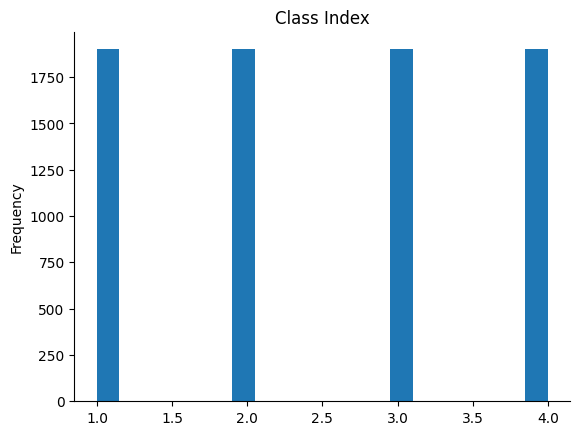

In [6]:
# @title Class Index

from matplotlib import pyplot as plt
df_test['Class Index'].plot(kind='hist', bins=20, title='Class Index')
plt.gca().spines[['top', 'right',]].set_visible(False)

The dataset is considered balanced since all of the classes are represented equally(same count).

In [7]:
pd.set_option('display.max_colwidth', None)

In [8]:
# lowercase the string column while handling missing values
df_train['Title'] = df_train['Title'].apply(lambda x: x.lower() if isinstance(x, str) else x)
df_train['Description'] = df_train['Description'].apply(lambda x: x.lower() if isinstance(x, str) else x)

print(df_train)

        Class Index  \
0                 3   
1                 3   
2                 3   
3                 3   
4                 3   
...             ...   
119995            1   
119996            2   
119997            2   
119998            2   
119999            2   

                                                                            Title  \
0                               wall st. bears claw back into the black (reuters)   
1                             carlyle looks toward commercial aerospace (reuters)   
2                                 oil and economy cloud stocks' outlook (reuters)   
3                    iraq halts oil exports from main southern pipeline (reuters)   
4       oil prices soar to all-time record, posing new menace to us economy (afp)   
...                                                                           ...   
119995                         pakistan's musharraf says won't quit as army chief   
119996                                     

In [9]:
# lowercase the string column while handling missing values
df_test['Title'] = df_test['Title'].apply(lambda x: x.lower() if isinstance(x, str) else x)
df_test['Description'] = df_test['Description'].apply(lambda x: x.lower() if isinstance(x, str) else x)

print(df_test)

      Class Index  \
0               3   
1               4   
2               4   
3               4   
4               4   
...           ...   
7595            1   
7596            2   
7597            2   
7598            3   
7599            3   

                                                                                       Title  \
0                                                          fears for t n pension after talks   
1     the race is on: second private team sets launch date for human spaceflight (space.com)   
2                                              ky. company wins grant to study peptides (ap)   
3                                              prediction unit helps forecast wildfires (ap)   
4                                                calif. aims to limit farm-related smog (ap)   
...                                                                                      ...   
7595                                                                       

In [10]:
df_train["text"] = df_train['Title'] +" "+ df_train['Description']

In [11]:
df_test["text"] = df_test['Title'] +" "+ df_test['Description']

In [12]:
df_train.head()

,Class Index,Title,Description,text
0,3,wall st. bears claw back into the black (reuters),"reuters - short-sellers, wall street's dwindling\band of ultra-cynics, are seeing green again.","wall st. bears claw back into the black (reuters) reuters - short-sellers, wall street's dwindling\band of ultra-cynics, are seeing green again."
1,3,carlyle looks toward commercial aerospace (reuters),"reuters - private investment firm carlyle group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.","carlyle looks toward commercial aerospace (reuters) reuters - private investment firm carlyle group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market."
2,3,oil and economy cloud stocks' outlook (reuters),reuters - soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.,oil and economy cloud stocks' outlook (reuters) reuters - soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.
3,3,iraq halts oil exports from main southern pipeline (reuters),"reuters - authorities have halted oil export\flows from the main pipeline in southern iraq after\intelligence showed a rebel militia could strike\infrastructure, an oil official said on saturday.","iraq halts oil exports from main southern pipeline (reuters) reuters - authorities have halted oil export\flows from the main pipeline in southern iraq after\intelligence showed a rebel militia could strike\infrastructure, an oil official said on saturday."
4,3,"oil prices soar to all-time record, posing new menace to us economy (afp)","afp - tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the us presidential elections.","oil prices soar to all-time record, posing new menace to us economy (afp) afp - tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the us presidential elections."


In [13]:
df_test.head()

,Class Index,Title,Description,text
0,3,fears for t n pension after talks,unions representing workers at turner newall say they are 'disappointed' after talks with stricken parent firm federal mogul.,fears for t n pension after talks unions representing workers at turner newall say they are 'disappointed' after talks with stricken parent firm federal mogul.
1,4,the race is on: second private team sets launch date for human spaceflight (space.com),"space.com - toronto, canada -- a second\team of rocketeers competing for the #36;10 million ansari x prize, a contest for\privately funded suborbital space flight, has officially announced the first\launch date for its manned rocket.","the race is on: second private team sets launch date for human spaceflight (space.com) space.com - toronto, canada -- a second\team of rocketeers competing for the #36;10 million ansari x prize, a contest for\privately funded suborbital space flight, has officially announced the first\launch date for its manned rocket."
2,4,ky. company wins grant to study peptides (ap),"ap - a company founded by a chemistry researcher at the university of louisville won a grant to develop a method of producing better peptides, which are short chains of amino acids, the building blocks of proteins.","ky. company wins grant to study peptides (ap) ap - a company founded by a chemistry researcher at the university of louisville won a grant to develop a method of producing better peptides, which are short chains of amino acids, the building blocks of proteins."
3,4,prediction unit helps forecast wildfires (ap),"ap - it's barely dawn when mike fitzpatrick starts his shift with a blur of colorful maps, figures and endless charts, but already he knows what the day will bring. lightning will strike in places he expects. winds will pick up, moist places will dry and flames will roar.","prediction unit helps forecast wildfires (ap) ap - it's barely dawn when mike fitzpatrick starts his shift with a blur of colorful maps, figures and endless charts, but already he knows what the day will bring. lightning will strike in places he expects. winds will pick up, moist places will dry and flames will roar."
4,4,calif. aims to limit farm-related smog (ap),"ap - southern california's smog-fighting agency went after emissions of the bovine variety friday, adopting the nation's first rules to reduce air pollution from dairy cow manure.","calif. aims to limit farm-related smog (ap) ap - southern california's smog-fighting agency went after emissions of the bovine variety friday, adopting the nation's first rules to reduce air pollution from dairy cow manure."


## Multinomial Naive Bayes word 1-grams

In [14]:
start = time.time()

tfidf_vec = TfidfVectorizer(ngram_range=(1,1), lowercase=True, analyzer="word")
X_train = tfidf_vec.fit_transform(df_train['text'])
X_test = tfidf_vec.transform(df_test['text'])
y_train = df_train["Class Index"]
y_test = df_test["Class Index"]
vocabulary = tfidf_vec.vocabulary_

classifier = MultinomialNB().fit(X_train, y_train)
classifier.predict(X_test)

end = time.time()
print("Multinomial Naive Bayes word 1-grams")
print("Accuracy:",classifier.score(X_test, y_test))
print("Dimensionality:",len(vocabulary))
print("Time Cost:",end - start)

Multinomial Naive Bayes word 1-grams
Accuracy: 0.9022368421052631
Dimensionality: 64999
Time Cost: 6.079569101333618


In [15]:
print(vocabulary)

{'wall': 62530, 'st': 54837, 'bears': 7396, 'claw': 12597, 'back': 6510, 'into': 30175, 'the': 57941, 'black': 8343, 'reuters': 48859, 'short': 52474, 'sellers': 51601, 'street': 55631, 'dwindling': 18919, 'band': 6832, 'of': 40988, 'ultra': 60119, 'cynics': 15554, 'are': 5306, 'seeing': 51508, 'green': 25521, 'again': 3522, 'carlyle': 11001, 'looks': 34637, 'toward': 58944, 'commercial': 13331, 'aerospace': 3403, 'private': 45493, 'investment': 30292, 'firm': 22405, 'group': 25735, 'which': 63226, 'has': 26652, 'reputation': 48494, 'for': 22993, 'making': 35421, 'well': 63059, 'timed': 58414, 'and': 4589, 'occasionally': 40893, 'controversial': 14174, 'plays': 44287, 'in': 29095, 'defense': 16296, 'industry': 29398, 'quietly': 46555, 'placed': 44152, 'its': 30675, 'bets': 7933, 'on': 41270, 'another': 4839, 'part': 42788, 'market': 35865, 'oil': 41108, 'economy': 19183, 'cloud': 12792, 'stocks': 55414, 'outlook': 41903, 'soaring': 53760, 'crude': 15146, 'prices': 45397, 'plus': 44425,

## Multinomial Naive Bayes char 3-grams

In [16]:
start2 = time.time()

tfidf_vec2 = TfidfVectorizer(ngram_range=(3,3), lowercase=True, analyzer="char")
X_train2 = tfidf_vec2.fit_transform(df_train['text'])
X_test2 = tfidf_vec2.transform(df_test['text'])
y_train2 = df_train["Class Index"]
y_test2 = df_test["Class Index"]
vocabulary2 = tfidf_vec2.vocabulary_

classifier2 = MultinomialNB().fit(X_train2, y_train2)
classifier2.predict(X_test2)

end2 = time.time()
print("Multinomial Naive Bayes char 3-grams")
print("Accuracy:",classifier2.score(X_test2, y_test2))
print("Dimensionality:",len(vocabulary2))
print("Time Cost:",end2 - start2)

Multinomial Naive Bayes char 3-grams
Accuracy: 0.8686842105263158
Dimensionality: 31074
Time Cost: 24.597088098526


In [17]:
print(vocabulary2)

{'wal': 29274, 'all': 12337, 'll ': 20631, 'l s': 20155, ' st': 1256, 'st.': 26693, 't. ': 26978, '. b': 4376, ' be': 640, 'bea': 13082, 'ear': 15419, 'ars': 12552, 'rs ': 25632, 's c': 25863, ' cl': 685, 'cla': 13960, 'law': 20379, 'aw ': 12698, 'w b': 29115, ' ba': 636, 'bac': 12975, 'ack': 12043, 'ck ': 13916, 'k i': 19513, ' in': 909, 'int': 18828, 'nto': 22553, 'to ': 27514, 'o t': 22745, ' th': 1286, 'the': 27383, 'he ': 17805, 'e b': 15095, ' bl': 647, 'bla': 13198, 'lac': 20359, 'k (': 19484, ' (r': 130, '(re': 3040, 'reu': 25286, 'eut': 16059, 'ute': 28505, 'ter': 27324, 'ers': 15939, 'rs)': 25637, 's) ': 25921, ') r': 3228, ' re': 1203, 's -': 25842, ' - ': 165, '- s': 3676, ' sh': 1244, 'sho': 26392, 'hor': 18018, 'ort': 23522, 'rt-': 25678, 't-s': 26971, '-se': 4243, 'sel': 26308, 'ell': 15744, 'lle': 20650, 'ler': 20500, 'rs,': 25638, 's, ': 25935, ', w': 3430, ' wa': 1383, 'str': 26715, 'tre': 27587, 'ree': 25270, 'eet': 15560, "et'": 15991, "t's": 26903, "'s ": 2365, 's 

## Linear SVC word 1-grams

In [18]:
start3 = time.time()

tfidf_vec3 = TfidfVectorizer(ngram_range=(1,1), lowercase=True, analyzer="word")
X_train3 = tfidf_vec3.fit_transform(df_train['text'])
X_test3 = tfidf_vec3.transform(df_test['text'])
y_train3 = df_train["Class Index"]
y_test3 = df_test["Class Index"]
vocabulary3 = tfidf_vec3.vocabulary_

classifier3 = LinearSVC(C=1).fit(X_train3, y_train3)
classifier3.predict(X_test3)

end3 = time.time()
print("Linear SVC word 1-grams")
print("Accuracy:",classifier3.score(X_test3, y_test3))
print("Dimensionality:",len(vocabulary3))
print("Time Cost:",end3 - start3)

Linear SVC word 1-grams
Accuracy: 0.9196052631578947
Dimensionality: 64999
Time Cost: 10.826524019241333


Linear SVC char 3-grams

In [19]:
start4 = time.time()

tfidf_vec4 = TfidfVectorizer(ngram_range=(3,3), lowercase=True, analyzer="char")
X_train4 = tfidf_vec4.fit_transform(df_train['text'])
X_test4 = tfidf_vec4.transform(df_test['text'])
y_train4 = df_train["Class Index"]
y_test4 = df_test["Class Index"]
vocabulary4 = tfidf_vec4.vocabulary_

classifier4 = LinearSVC(C=1).fit(X_train4, y_train4)
classifier4.predict(X_test4)

end4 = time.time()
print("Linear SVC char 3-grams")
print("Accuracy:",classifier4.score(X_test4, y_test4))
print("Dimensionality:",len(vocabulary4))
print("Time Cost:",end4 - start4)

Linear SVC char 3-grams
Accuracy: 0.9121052631578948
Dimensionality: 31074
Time Cost: 39.57918667793274


In [20]:
print(range(0,500))

range(0, 500)


| | Multinomial Naive Bayes word 1-grams | Multinomial Naive Bayes char 3-grams | Linear SVC word 1-grams | Linear SVC char 3-grams |
|:---------|:--------:|---------:|---------:|---------:|
|  Accuracy  |  0.9022368421052631   |  0.8686842105263158  |0.9196052631578947   |  0.9121052631578948  |
|  Dimensionality  |  64999   |  31074   | 64999    | 31074  |
|  Timecost   |  6.079569101333618   |  24.597088098526   | 10.826524019241333   |  39.57918667793274   |


It is observed that Linear SVC performs better than Multinomial Naive Bayes. It has consistently higher accuracy in all of the experiments. Also, trigrams produced the largest vocabulary. The unigrams produce half the vocabulary of the trigrams.

## Detect news that were misclassifed by all of the models

Below, we create a dictionary of predicted and test text pairs. The true label is used as keyword.

In [21]:
from collections import defaultdict
def find_missclassfication(y_pred,y_test,test_text):
  missclf_text = []
  missclf_label = []
  misclf_dict = defaultdict(list)
  counter=0
  for i in range(0,len(y_test)):
    if(y_test[i]!= y_pred[i]):
      missclf_text.append(test_text[i])
      missclf_label.append(y_test[i])
      misclf_dict[y_test[i]].append((y_pred[i], test_text[i]))
      counter+=1

  return missclf_text,missclf_label, counter, misclf_dict


y_pred = classifier.predict(X_test)
false_text, false_labels, counter, misclf_data = find_missclassfication(y_pred, y_test, df_test["text"])
print("NB word 1-grams misclassification count:",counter)

y_pred2 = classifier2.predict(X_test2)
false_text2, false_labels2, counter2, misclf_data2 = find_missclassfication(y_pred2, y_test2, df_test["text"])
print("NB char 3-grams misclassification count:",counter2)

y_pred3 = classifier3.predict(X_test3)
false_text3, false_labels3, counter3, misclf_data3 = find_missclassfication(y_pred3, y_test3, df_test["text"])
print("LinearSVC word 1-grams misclassification count:",counter3)

y_pred4 = classifier4.predict(X_test4)
false_text4, false_labels4, counter4, misclf_data4 = find_missclassfication(y_pred4, y_test4, df_test["text"])
print("Linear SVC char 3-grams misclassification count:",counter4)

NB word 1-grams misclassification count: 743
NB char 3-grams misclassification count: 998
LinearSVC word 1-grams misclassification count: 611
Linear SVC char 3-grams misclassification count: 668


In [22]:
print(df_test["Class Index"])

0       3
1       4
2       4
3       4
4       4
       ..
7595    1
7596    2
7597    2
7598    3
7599    3
Name: Class Index, Length: 7600, dtype: int64


In [23]:
def find_common_texts_across_models(common_classes, *models):
    common_texts_per_class = {}
    for class_label in common_classes:
        # Initialize list of sets containing texts for each model
        model_texts = [set((text for _, text in model[class_label])) for model in models if class_label in model]

        # Find intersection of all sets (common texts across all models)
        common_texts = set.intersection(*model_texts) if model_texts else set()

        # Store the common texts for this class
        common_texts_per_class[class_label] = list(common_texts)

    return common_texts_per_class

a=common_texts_per_class = find_common_texts_across_models(
    [1,2,3,4],
    misclf_data,
    misclf_data2,
    misclf_data3,
    misclf_data4
)

print("Texts that were missclassified by all of the models, displayed for each class:")
print("World",len(a[1]))
print("Sports",len(a[2]))
print("Business",len(a[3]))
print("Sci/Tech",len(a[4]))

Texts that were missclassified by all of the models, displayed for each class:
World 112
Sports 9
Business 135
Sci/Tech 85


Choose a commonly misclassified text randomly and detect the missclassification

In [24]:
import random

def display_random_common_text_and_predictions(common_texts_per_class, *models):
    # Filter classes with at least one common text
    classes_with_texts = {class_label: texts for class_label, texts in common_texts_per_class.items() if texts}

    if not classes_with_texts:
        print("No common misclassified texts found across all models.")
        return

    # Randomly select a class that has misclassified texts
    chosen_class = random.choice(list(classes_with_texts.keys()))
    # Randomly select a text from this class
    chosen_text = random.choice(classes_with_texts[chosen_class])

    print(f"Randomly selected misclassified text from Class {chosen_class}: '{chosen_text}'")

    # Display predictions for the selected text from each model
    for idx, model in enumerate(models, 1):
        # Find the prediction for the chosen text in the current model's data for the chosen class
        prediction = [pred for pred, text in model.get(chosen_class, []) if text == chosen_text]
        if prediction:
            print(f"Model {idx} predicted as: {prediction[0]}")
        else:
            print(f"Model {idx} did not misclassify this text.")

    return chosen_class, chosen_text



# Call the function to display a random text and its predictions
misclass, txt = display_random_common_text_and_predictions(a, misclf_data, misclf_data2, misclf_data3, misclf_data4)


Randomly selected misclassified text from Class 1: 'ken caminiti, 1996 nl mvp, dies at age 41 new york - ken caminiti, the 1996 national league mvp who later admitted using steroids during his major league career, died sunday. he was 41...'
Model 1 predicted as: 2
Model 2 predicted as: 2
Model 3 predicted as: 2
Model 4 predicted as: 2


Verify result by different look-up method

In [28]:
# Finding an exact match
for idx, text in misclf_data[misclass]:
    if text == txt:
        print(f"Model 1 found exact match that was predicted as {idx}: {text} ")
        break
else:
    print("No exact match found.")

# Finding an exact match
for idx, text in misclf_data2[misclass]:
    if text == txt:
        print(f"Model 2 found exact match that was predicted as {idx}: {text} ")
        break
else:
    print("No exact match found.")

# Finding an exact match
for idx, text in misclf_data3[misclass]:
    if text == txt:
        print(f"Model 3 found exact match that was predicted as {idx}: {text} ")
        break
else:
    print("No exact match found.")


# Finding an exact match
for idx, text in misclf_data4[misclass]:
    if text == txt:
        print(f"Model 4 found exact match that was predicted as {idx}: {text} ")
        break
else:
    print("No exact match found.")

Model 1 found exact match that was predicted as 2: ken caminiti, 1996 nl mvp, dies at age 41 new york - ken caminiti, the 1996 national league mvp who later admitted using steroids during his major league career, died sunday. he was 41... 
Model 2 found exact match that was predicted as 2: ken caminiti, 1996 nl mvp, dies at age 41 new york - ken caminiti, the 1996 national league mvp who later admitted using steroids during his major league career, died sunday. he was 41... 
Model 3 found exact match that was predicted as 2: ken caminiti, 1996 nl mvp, dies at age 41 new york - ken caminiti, the 1996 national league mvp who later admitted using steroids during his major league career, died sunday. he was 41... 
Model 4 found exact match that was predicted as 2: ken caminiti, 1996 nl mvp, dies at age 41 new york - ken caminiti, the 1996 national league mvp who later admitted using steroids during his major league career, died sunday. he was 41... 


In [26]:
print(misclf_data)

defaultdict(<class 'list'>, {4: [(2, "prediction unit helps forecast wildfires (ap) ap - it's barely dawn when mike fitzpatrick starts his shift with a blur of colorful maps, figures and endless charts, but already he knows what the day will bring. lightning will strike in places he expects. winds will pick up, moist places will dry and flames will roar."), (3, "storage, servers bruise hp earnings update earnings per share rise compared with a year ago, but company misses analysts' expectations by a long shot."), (3, 'ibm to hire even more new workers by the end of the year, the computing giant plans to have its biggest headcount since 1991.'), (3, "some people not eligible to get in on google ipo google has billed its ipo as a way for everyday people to get in on the process, denying wall street the usual stranglehold it's had on ipos. public bidding, a minimum of just five shares, an open process with 28 underwriters - all this pointed to a new level of public participation. but this

From the texts that were misclassified, extract pairs(tuples) of real class and false prediction

In [27]:
def find_common_texts_across_models(common_classes, *models):
    common_texts_per_class = {}
    for class_label in common_classes:
        # Initialize list of sets containing texts for each model
        model_texts = [set((text for _, text in model[class_label])) for model in models if class_label in model]

        # Find intersection of all sets (common texts across all models)
        common_texts = set.intersection(*model_texts) if model_texts else set()

        # Store the common texts for this class
        common_texts_per_class[class_label] = list(common_texts)

    return common_texts_per_class

def count_common_misclass_pairs(common_texts, models):
    misclass_freqs = Counter()

    # Iterate through each class and their common misclassified texts
    for cls, texts in common_texts.items():
        if not texts:
            continue  # There are no common misclassified texts for this class

        # Count how many times each text is predicted as each label in each model
        for text in texts:
            for model in models:
                for pred_label, model_text in model.get(cls, []):
                    if model_text == text:
                        # Increment the frequency of this (true_label, predicted_label) pair
                        misclass_freqs[(cls, pred_label)] += 1

    # Sort the pairs by frequency in descending order before returning
    sorted_pairs = sorted(misclass_freqs.items(), key=lambda item: item[1], reverse=True)
    return sorted_pairs

# Assuming class labels are 1, 2, 3, 4 representing World, Sports, Business, Sci/Tech respectively

# Example of using these functions together
common_classes = [1, 2, 3, 4]

models = [misclf_data, misclf_data2, misclf_data3, misclf_data4]  # These should be already defined dictionaries as described

# common_texts = find_common_misclassified_texts(models, common_classes)
# sorted_misclass_pairs = count_common_misclass_pairs(common_texts, models)

class_names = {
    1: "World",
    2: "Sports",
    3: "Business",
    4: "Sci/Tech"
}

# Find common misclassified texts
common_texts = find_common_texts_across_models(common_classes, *models)

# Count and sort misclassification pairs
sorted_misclass_pairs = count_common_misclass_pairs(common_texts, models)


# Print the results, now sorted by frequency
print("Most common Misclassification Pairs:")
for (real_class, predicted_class), frequency in sorted_misclass_pairs:
    real_class_name = class_names[real_class]
    predicted_class_name = class_names[predicted_class]
    print(f"Real Class: {real_class_name}, Predicted Class: {predicted_class_name}, Frequency: {frequency}")


Most common Misclassification Pairs:
Real Class: Business, Predicted Class: Sci/Tech, Frequency: 381
Real Class: Sci/Tech, Predicted Class: Business, Frequency: 206
Real Class: World, Predicted Class: Business, Frequency: 194
Real Class: World, Predicted Class: Sports, Frequency: 144
Real Class: Business, Predicted Class: World, Frequency: 123
Real Class: World, Predicted Class: Sci/Tech, Frequency: 110
Real Class: Sci/Tech, Predicted Class: World, Frequency: 103
Real Class: Business, Predicted Class: Sports, Frequency: 36
Real Class: Sci/Tech, Predicted Class: Sports, Frequency: 31
Real Class: Sports, Predicted Class: World, Frequency: 17
Real Class: Sports, Predicted Class: Business, Frequency: 12
Real Class: Sports, Predicted Class: Sci/Tech, Frequency: 7


Based on the count of occurences, the business news were misclassified as Sci/Tech most frequently. The subset of the commonly misclassified news was used as input to the two functions above.